# LINEAR FEEDBACK SHIFT REGISTERS

## NOTEBOOK 2 - RANDOMNESS

LFSRs can be used to generate pseudo random numbers. To see how, begin by initialising an LFSR and generating an output.

#### LIBRARY IMPORT

In [2]:
from lfsr_library import LFSR

### LFSR INIT AND GENERATE

In [9]:
DEGREE: int = 10
TAPS: list[int] = [2, 3, 7]

SEED = 0b1011101101
ITERATIONS = 40

lfsr: LFSR = LFSR(degree=DEGREE, tap_positions=TAPS)
lfsr.generate(bitseq=SEED, iterations=ITERATIONS)

stream: str = lfsr.stream

print(stream)

10110111011101110111011101110111011101110


### LFSR RANDOMNESS MEASURE

The proportion of zeros to ones in the bit stream generated by an LFSR gives a measure of its randomness. Ideally, an equal number of zeroes and ones indicates a maximal level of randomness in analogy to the outcome of flipping a fair coin. 

To see level of randomness in the lfsr object above, call the method `randomness()` and retrieve analytics in `.randomness_dict` as follows.


In [16]:
lfsr.randomness()
for k, v in lfsr.randomness_dict.items():
    print(f"The probability bit = {k} = {v}")

The probability bit = 0 = 26.8293 %
The probability bit = 1 = 73.1707 %


#### RANDOMNESS AND ITERATIONS

After `40` iterations, the output generated by the lfsr is more like a weighted coin than a fair. Increasing the number of iterations to, say, `400` will find:

In [20]:
ITERATIONS: int = 400
lfsr.generate(bitseq=SEED, iterations=ITERATIONS)
lfsr.randomness()
lfsr.randomness_dict

{'0': '25.1870 %', '1': '74.8130 %'}

### PLOTS

#### RANDOMNESS 

On increasing the number of iterations, there appears to be a convergence in probability distributions. Our lfsr object looks like a weighted coin with weights around `25%` and `75%`. Calling `randomness_plot()` displays a plot of the probability a bit chosen from the bitstream is `1` against iterations (state). The default plot size is `(12, 7)`. Passing a tuple to the `figsize` argument will resize the plot. See below.


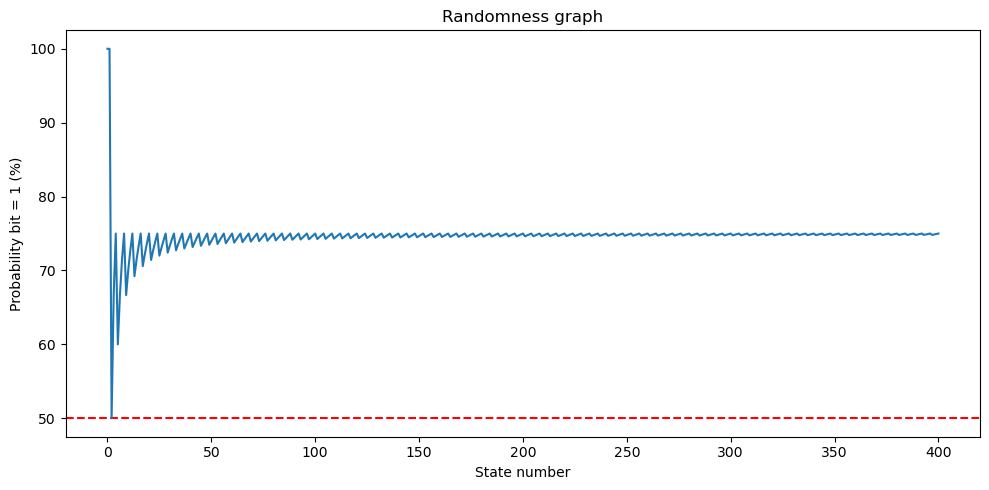

In [27]:
lfsr.randomness_plot(figsize=(10, 5))

As the states, or, iterations increase in the plot above, the probability appears to converge and lose much of its initial volatility.

#### STREAM PLOT

A square plot displaying the stream generated by the lfsr can be viewed through calling `.plot_stream()` as follows.

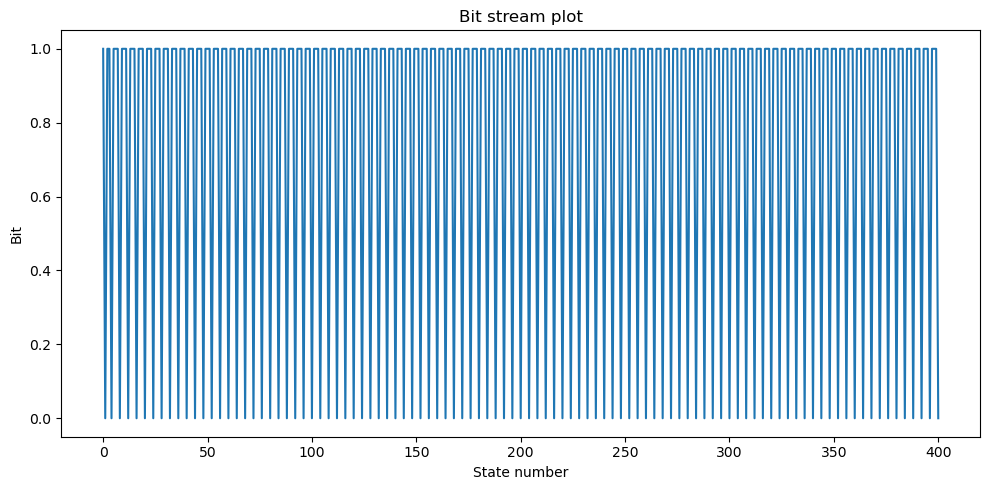

In [26]:
lfsr.plot_stream(figsize=(10, 5))

### PSEUDO RANDOM NUMBER GENERATION

The method `generate_num()` will return a number between a specified range, retrievable by `.randum_num`. This method takes as argument:

    - a range object specified by a minimum and maximum value

See below for number between `100` and `999` generated by `lfsr` above.

In [30]:
RANGE: range = range(100, 999)
lfsr.generate_num(num_range=RANGE)
lfsr.random_num

147

The number generated after each iteration will be different. However, as we can see from the randomness plot above, the numbers generated on each iteration will be skewed `75 %` of the time toward one value over another (c.f., weighted coins).

### COMPARISON

That our lfsr above is clearly skewed might be quite unsatisfying, especially if it is incorporated in an encryption schema. Will a different set of taps give a more satisfying level of randomness (i.e., closer to a `50 : 50` split between `0`s and `1`s)? By only changing the tap position we find: 


Probability bit = 0 is 50.3741 %
Probability bit = 1 is 49.6259 %


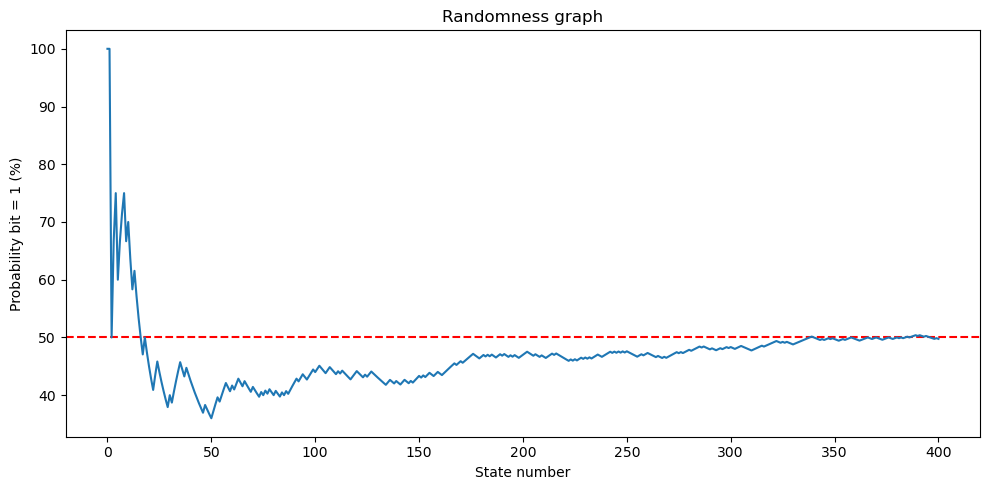

In [33]:
TAPS_2 = [1, 4, 5, 6]

new_lfsr: LFSR = LFSR(degree=DEGREE, tap_positions=TAPS_2)
new_lfsr.generate(bitseq=SEED, iterations=ITERATIONS)
new_lfsr.randomness()
for k, v in new_lfsr.randomness_dict.items():
    print(f"Probability bit = {k} is {v}")

new_lfsr.randomness_plot(figsize=(10, 5))

An LFSR with taps at positions `1, 4, 5, 6` evidently has better randomness properties than one with taps at positions `2, 3, 7`.